<a href="https://colab.research.google.com/github/tavochopadron-cyber/inteligencia-artificial/blob/main/Multicapa/copia_de_expocicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# ========== CONJUNTO DE DATOS ==========
# Generar dataset de 500 prospectos para Grandes Ligas de Béisbol
n_muestras = 500

# Habilidades de bateo (rango competitivo): 70-100
bateo = np.random.randint(70, 101, (n_muestras, 6))

# Habilidades defensivas (rango competitivo): 65-95
defensa = np.random.randint(65, 96, (n_muestras, 6))

# Habilidades físicas y mentales (rango competitivo): 60-90
fisico_mental = np.random.randint(60, 91, (n_muestras, 6))

# Nombres de columnas específicas para béisbol de Grandes Ligas
columnas = [
    # Habilidades de bateo esenciales
    'potencia_bateo', 'contacto_bate', 'vision_zona', 'disciplina_plato', 'velocidad_bases', 'clutch_hitting',
    # Habilidades defensivas por posición
    'brazo_campo_externo', 'brazo_infield', 'range_defensivo', 'agarre_flys', 'velocidad_reaccion', 'doble_play',
    # Habilidades físicas y mentales
    'velocidad_carrera', 'resistencia_fisica', 'fuerza_brazo', 'mentalidad_competitiva', 'trabajo_equipo', 'liderazgo_diamante'
]

# Crear DataFrame con los 500 prospectos de béisbol
df = pd.DataFrame(np.concatenate([bateo, defensa, fisico_mental], axis=1), columns=columnas)

# ========== PREPARACIÓN DE ETIQUETAS ==========
# Calcular promedio por grupo y promedio total
prom_bateo = df[['potencia_bateo', 'contacto_bate', 'vision_zona', 'disciplina_plato', 'velocidad_bases', 'clutch_hitting']].mean(axis=1)
prom_defensivas = df[['brazo_campo_externo', 'brazo_infield', 'range_defensivo', 'agarre_flys', 'velocidad_reaccion', 'doble_play']].mean(axis=1)
prom_físicasymentales = df[['velocidad_carrera', 'resistencia_fisica', 'fuerza_brazo', 'mentalidad_competitiva', 'trabajo_equipo', 'liderazgo_diamante']].mean(axis=1)

# Promedio total = promedio de los 3 promedios
prom_total = (prom_bateo + prom_defensivas + prom_físicasymentales) / 3

# Etiqueta: 1 = apto si promedio total > 76
y = (prom_total > 76).astype(int)

# one-hot encoding: convierte [0,1] en [[1,0], [0,1]]
y = pd.get_dummies(y).values

In [ ]:
# ========== DIVISIÓN DE DATOS ==========
from sklearn.model_selection import train_test_split
# Dividir datos: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42
)


In [ ]:
# ========== ESCALADO ==========
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Estandarizar datos para mejor rendimiento de la red
X_train = scaler.fit_transform(X_train)  # Aprende y transforma entrenamiento
X_test = scaler.transform(X_test)        # Aplica misma transformación a prueba

In [ ]:
# ========== RED NEURONAL ==========
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Crear modelo de red neuronal secuencial
modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),  # Capa entrada + oculta 1
    Dense(32, activation='relu'),  # Capa oculta 2
    Dense(16, activation='relu'),  # Capa oculta 3
    Dense(2, activation='softmax') # Capa salida (2)
])

# Configurar optimizador Adam
adam = Adam(learning_rate=0.001)

# Compilar modelo: definir cómo aprende
modelo.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# ========== ENTRENAMIENTO ==========
history = modelo.fit(
    X_train, y_train,
    epochs=100,           # 100 pasadas completas por los datos
    batch_size=32,        # Procesa 32 muestras por lote
    validation_data=(X_test, y_test),  # Datos para validar durante entrenamiento
    verbose=1             # Muestra progreso
)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9733 - loss: 0.4290 - val_accuracy: 1.0000 - val_loss: 0.2140
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9605 - loss: 0.2363 - val_accuracy: 1.0000 - val_loss: 0.0774
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9758 - loss: 0.1258 - val_accuracy: 1.0000 - val_loss: 0.0336
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9711 - loss: 0.1279 - val_accuracy: 1.0000 - val_loss: 0.0231
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9663 - loss: 0.1193 - val_accuracy: 1.0000 - val_loss: 0.0217
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9756 - loss: 0.0813 - val_accuracy: 1.0000 - val_loss: 0.0192
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9759 - loss: 0.0686 - val_accuracy: 1.0000 - val_loss: 0.0181
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9683 - loss: 0.0708 - val_accuracy: 1.

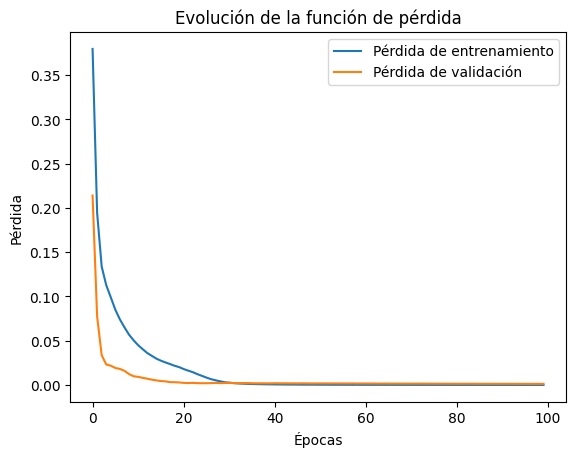

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0019

Loss: 0.0012  |  Accuracy: 1.0000


In [ ]:
# ========== MÉTRICAS Y EVALUACIÓN ==========
import matplotlib.pyplot as plt

# Graficar evolución de la pérdida durante entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la función de pérdida')
plt.show()

# Evaluar modelo final con datos de prueba
loss, acc = modelo.evaluate(X_test, y_test)
print(f"\nLoss: {loss:.4f}  |  Accuracy: {acc:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


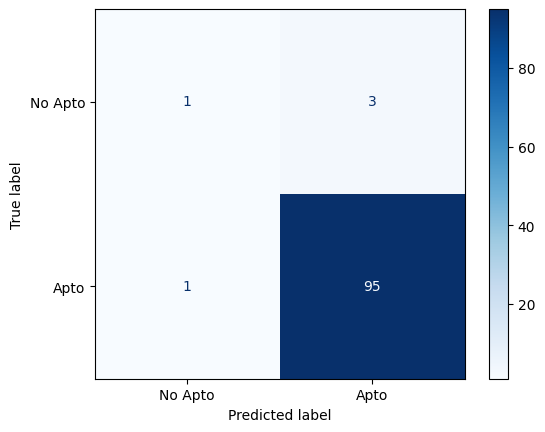


Sensitivity (Recall) por clase:
No Apto: 0.25
Apto: 0.99


In [33]:
# ========== MATRIZ DE CONFUSIÓN ==========
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

# Predecir con el modelo entrenado
pred = modelo.predict(X_test)
y_pred = np.argmax(pred, axis=1)  # Convertir probabilidades a clases (0 o 1)
y_true = np.argmax(y_test, axis=1)  # Convertir one-hot a clases

# Crear y mostrar matriz de confusión
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Apto', 'Apto'])
disp.plot(cmap='Blues')
plt.show()

# Calcular sensibilidad (recall) por clase
sensitivity = recall_score(y_true, y_pred, average=None)
print("\nSensitivity (Recall) por clase:")
print(f"No Apto: {sensitivity[0]:.2f}")
print(f"Apto: {sensitivity[1]:.2f}")